In [118]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [119]:
scores=pd.read_csv(r"C:\Users\sergio.salas\Downloads\media-6 (1)\SuppT_cov_modeling_Multiciliated.csv",index_col=0)

In [120]:
scores

,AveExpr,Coef.(Intercept),Coef.sexfemale,Coef.age,Coef.smoking_status_num,Coef.BMI,Coef.anatomical_region_ccf_score,Coef.nose,t.(Intercept),t.sexfemale,...,P.value.smoking_status_num,P.value.BMI,P.value.anatomical_region_ccf_score,P.value.nose,adj_P.value.sexfemale,adj_P.value.age,adj_P.value.smoking_status_num,adj_P.value.BMI,adj_P.value.anatomical_region_ccf_score,adj_P.value.nose
Gene,,,,,,,,,,,,,,,,,,,,,
TSPAN6,8.017382,8.414856,0.049560,-0.039314,-0.120407,-0.085067,-0.683613,0.554075,32.283660,0.515989,...,0.339295,0.556826,0.034428,0.000608,0.999723,0.999152,0.983519,0.999989,0.313796,0.008285
DPM1,6.163717,6.826097,0.022516,-0.163986,0.018991,-0.013977,-0.641238,-0.313113,17.832530,0.203394,...,0.898544,0.937454,0.119191,0.109090,0.999964,0.999152,0.999719,0.999989,0.508589,0.304358
SCYL3,4.033167,4.703288,-0.060114,-0.102574,0.054464,0.222960,-0.988731,0.388311,19.146597,-0.447972,...,0.740170,0.261122,0.001197,0.027405,0.999723,0.999152,0.996423,0.975917,0.058315,0.124745
C1orf112,1.649564,0.991308,0.155645,0.171123,0.276450,0.296399,0.220254,-0.092994,2.573780,0.786194,...,0.243123,0.293353,0.626379,0.746299,0.995798,0.999152,0.983519,0.975917,0.886552,0.872900
FGR,0.335985,-0.703398,-0.144459,0.571889,-0.440694,-0.269288,1.450943,0.023609,-0.548148,-0.380817,...,0.351281,0.595180,0.320588,0.974306,0.999723,0.999152,0.983519,0.999989,0.716216,0.988092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RP11-511P7.5,3.074445,2.108509,0.150523,-0.411094,0.185290,0.087146,1.545997,0.067609,6.803311,0.961309,...,0.329817,0.695470,0.000052,0.774998,0.990186,0.899352,0.983519,0.999989,0.008798,0.888751
RP11-557N21.1,-0.252914,0.141795,0.010528,-0.317941,-0.505462,0.036305,-0.619843,0.156405,0.114073,0.027889,...,0.291761,0.946089,0.664015,0.816783,0.999964,0.999152,0.983519,0.999989,0.902531,0.912007
RP1-221C16.8,0.119210,0.827192,-0.109216,0.013880,-0.819862,-0.534488,-0.378084,-0.897819,0.735026,-0.328754,...,0.044027,0.266549,0.763334,0.160364,0.999723,0.999533,0.983519,0.975917,0.938958,0.384063


In [121]:
genes=['A2M', 'ACAN','ACKR1','ACTA2', 'ADIRF','AGER','AGR2','ALDH1A3','ANXA2','APOC1','APOD','APOE',
 'AREG','ASCL3','ATP6V0B','BMX','BPIFB1','BTG1','C1QA','C1QC','C3','CAPS','CAV1',
'CCL21','CCL5','CD24','CD3D','CD3E','CD52','CD74','CD79A','CD8A','CD9','CDC20B','CDH2','CFD','CHI3L1','CLC','CLDN5','CLU','COL1A1','COX4I2','CPA','CPA3','CST3','CXCR2','DCN','DDIT4','DNAH12',
 'EDNRB','EGR1','EPCAM','FABP5','FBLN1','FCGR3B','FCN1','FCN3','FHOD3','FKBP11','FN1','FXYD1','GADD45B','GAPT','GNLY','GPM6B','GPR183','GPX3','GRID2','GRP','GZMB','HDC','HES6',
 'HLA-DPA1','HLA-DPB1','HLA-DQA1','HLA-DRA','HLA-DRB1','HLA-DRB5','HPGD','HSPB1','IER2','IFI27','IFITM1','IFITM2','IFITM3','IGFBP7','IL1RL1','IL32','JCHAIN','JUN',
 'KDR','KLF6','KLRD1','KRT15','KRT17','KRT5','LAMC3','LTBP2','LYZ','MCEMP1','MGP','MKI67','MS4A1','MSLN','MT-ND6','MT1A','MT2A',
 'MUC5AC','MUC5B','MYH11','MYL9','NKG7','NREP','PBK','PCSK1N','PLA2G2A','PLD5','PLIN2','PLVAP','PRR4','PRSS23','RAMP2','RGCC','RGS13',
 'RHOB','RNASE1','RPS29','S100A11','S100A2','S100A4','S100A8','S100B','S100P','SAT1','SCEL','SCGB1A1','SEC11C',
 'SERPINA1','SERPINB3','SFTPA1','SFTPB','SLC2A1','SLPI','SPRR1A','SPRR1B','SPRR3','SRGN',
 'STEAP4','TAGLN','TCF21','TFF3','TIMP1','TOP2A','TPM2','TPSAB1','TSC22D3','TYROBP','VIM','VSIG2','WFDC2','ZFP36']

In [122]:
scoresfilt=scores.loc[scores.index.isin(genes),:]
#scoresfilt=scoresfilt[abs(scoresfilt['Coef.anatomical_region_ccf_score'])>2]
scoresfilt=scoresfilt.sort_values(by='Coef.anatomical_region_ccf_score')
scoresfilt['pos']=range(0,scoresfilt.shape[0])

In [123]:
scoresfilt.index

Index(['SPRR3', 'KRT5', 'MSLN', 'KRT17', 'HDC', 'GRP', 'SPRR1B', 'S100P',
       'PLVAP', 'KRT15',
       ...
       'HSPB1', 'PRR4', 'MYL9', 'FHOD3', 'RAMP2', 'APOE', 'CD52', 'TPSAB1',
       'MGP', 'SCGB1A1'],
      dtype='object', name='Gene', length=150)

In [124]:
scoresfilt

,AveExpr,Coef.(Intercept),Coef.sexfemale,Coef.age,Coef.smoking_status_num,Coef.BMI,Coef.anatomical_region_ccf_score,Coef.nose,t.(Intercept),t.sexfemale,...,P.value.BMI,P.value.anatomical_region_ccf_score,P.value.nose,adj_P.value.sexfemale,adj_P.value.age,adj_P.value.smoking_status_num,adj_P.value.BMI,adj_P.value.anatomical_region_ccf_score,adj_P.value.nose,pos
Gene,,,,,,,,,,,,,,,,,,,,,
SPRR3,0.912144,3.671575,0.647969,-0.196595,-0.230922,1.602561,-4.531181,1.129704,2.511647,1.504696,...,0.019454,0.016805,1.583135e-01,0.915939,0.999152,0.990762,0.882576,0.223876,3.815832e-01,0
KRT5,2.061128,6.640281,0.009860,0.031492,-0.714143,-0.981702,-3.634904,-5.160862,4.229812,0.027584,...,0.124228,0.047047,5.796408e-09,0.999964,0.999533,0.983519,0.964471,0.355420,9.540986e-07,1
MSLN,3.655264,6.763018,-0.289258,-0.425355,-0.068200,0.130393,-3.279940,-0.272143,7.813269,-0.921794,...,0.797503,0.004002,5.809402e-01,0.990933,0.999152,0.999719,0.999989,0.106254,7.749262e-01,2
KRT17,3.276367,7.402905,0.188149,-0.383328,0.265462,-0.529935,-2.999585,-4.998325,4.764442,0.608329,...,0.300255,0.086470,1.344645e-09,0.999723,0.999152,0.983519,0.977358,0.454619,2.778408e-07,3
HDC,1.121202,3.045727,0.008608,-0.117044,-0.373206,0.100907,-2.580011,-0.646187,4.376418,0.039856,...,0.765234,0.002116,8.849913e-02,0.999964,0.999152,0.983519,0.999989,0.078324,2.672508e-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
APOE,1.305707,0.507477,-0.233253,-1.427321,-0.580614,-0.939572,3.994278,0.646972,0.299046,-0.489043,...,0.114226,0.039176,5.192772e-01,0.999723,0.963196,0.983519,0.952654,0.333775,7.307021e-01,145
CD52,2.240964,0.757513,-0.342039,0.058441,-0.758997,-0.341396,3.995483,-0.075422,0.494639,-0.973095,...,0.451607,0.017234,9.218431e-01,0.989658,0.999533,0.983519,0.998917,0.227401,9.652269e-01,146
TPSAB1,0.741619,-1.697296,0.114360,0.241289,-1.367844,-0.207020,4.138038,0.411702,-1.115419,0.231208,...,0.754256,0.027728,6.585544e-01,0.999964,0.999152,0.983519,0.999989,0.281679,8.233842e-01,147


In [125]:
gene=['BPIFB1',
 'MSLN',
 'HES6',
 'PRR4',
 'GPX3',
 'A2M',
 'MGP',
 'FN1',
 'SFTPB',
 'SFTPA1',
 'RNASE1',
 'CLDN5',
 'IL1RL1',
 'SCEL']

In [126]:
scoresfilt

,AveExpr,Coef.(Intercept),Coef.sexfemale,Coef.age,Coef.smoking_status_num,Coef.BMI,Coef.anatomical_region_ccf_score,Coef.nose,t.(Intercept),t.sexfemale,...,P.value.BMI,P.value.anatomical_region_ccf_score,P.value.nose,adj_P.value.sexfemale,adj_P.value.age,adj_P.value.smoking_status_num,adj_P.value.BMI,adj_P.value.anatomical_region_ccf_score,adj_P.value.nose,pos
Gene,,,,,,,,,,,,,,,,,,,,,
SPRR3,0.912144,3.671575,0.647969,-0.196595,-0.230922,1.602561,-4.531181,1.129704,2.511647,1.504696,...,0.019454,0.016805,1.583135e-01,0.915939,0.999152,0.990762,0.882576,0.223876,3.815832e-01,0
KRT5,2.061128,6.640281,0.009860,0.031492,-0.714143,-0.981702,-3.634904,-5.160862,4.229812,0.027584,...,0.124228,0.047047,5.796408e-09,0.999964,0.999533,0.983519,0.964471,0.355420,9.540986e-07,1
MSLN,3.655264,6.763018,-0.289258,-0.425355,-0.068200,0.130393,-3.279940,-0.272143,7.813269,-0.921794,...,0.797503,0.004002,5.809402e-01,0.990933,0.999152,0.999719,0.999989,0.106254,7.749262e-01,2
KRT17,3.276367,7.402905,0.188149,-0.383328,0.265462,-0.529935,-2.999585,-4.998325,4.764442,0.608329,...,0.300255,0.086470,1.344645e-09,0.999723,0.999152,0.983519,0.977358,0.454619,2.778408e-07,3
HDC,1.121202,3.045727,0.008608,-0.117044,-0.373206,0.100907,-2.580011,-0.646187,4.376418,0.039856,...,0.765234,0.002116,8.849913e-02,0.999964,0.999152,0.983519,0.999989,0.078324,2.672508e-01,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
APOE,1.305707,0.507477,-0.233253,-1.427321,-0.580614,-0.939572,3.994278,0.646972,0.299046,-0.489043,...,0.114226,0.039176,5.192772e-01,0.999723,0.963196,0.983519,0.952654,0.333775,7.307021e-01,145
CD52,2.240964,0.757513,-0.342039,0.058441,-0.758997,-0.341396,3.995483,-0.075422,0.494639,-0.973095,...,0.451607,0.017234,9.218431e-01,0.989658,0.999533,0.983519,0.998917,0.227401,9.652269e-01,146
TPSAB1,0.741619,-1.697296,0.114360,0.241289,-1.367844,-0.207020,4.138038,0.411702,-1.115419,0.231208,...,0.754256,0.027728,6.585544e-01,0.999964,0.999152,0.983519,0.999989,0.281679,8.233842e-01,147


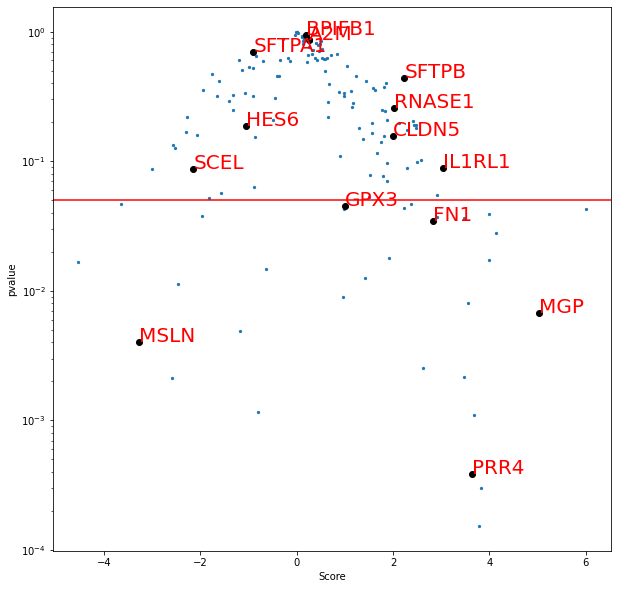

In [128]:
fig=plt.figure(figsize=[10,10])
ax = plt.gca()
plt.scatter(scoresfilt['Coef.anatomical_region_ccf_score'],scoresfilt['P.value.anatomical_region_ccf_score'],s=5)
#for e in range(0,scoresfilt.shape[0]):
#    plt.text(scoresfilt['Coef.anatomical_region_ccf_score'][e],scoresfilt['P.value.anatomical_region_ccf_score'][e],scoresfilt.index[e],size=10)

plt.axhline(0.05,c='red')
#plt.axvline(-1,c='red')
plt.xlabel('Score')
plt.ylabel('pvalue')

sublist=scoresfilt.loc[scoresfilt.index.isin(gene),:]
plt.scatter(sublist['Coef.anatomical_region_ccf_score'],sublist['P.value.anatomical_region_ccf_score'],c='black')

for e in range(0,sublist.shape[0]):
    plt.text(sublist['Coef.anatomical_region_ccf_score'][e],sublist['P.value.anatomical_region_ccf_score'][e],sublist.index[e],size=20,color='red')

ax.set_yscale('log')